In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:
try:
    officer_df = pd.read_csv("chicago-police-data/data/unified_data/profiles/officer-profiles.csv")
    print(officer_df.columns)
    officer_df_cleaned = officer_df[["race", "gender", "appointed_date", "resignation_date", 
                                     "current_status", "resignation_date", "cleaned_rank"]]
    officer_df_cleaned.dropna(subset = ["race"], inplace = True)
    officer_df_cleaned.dropna(subset = ["cleaned_rank"], inplace = True)
except SettingWithCopyWarning:
    pass
officer_df_cleaned

Index(['UID', 'first_name', 'last_name', 'middle_initial', 'middle_initial2',
       'suffix_name', 'birth_year', 'race', 'gender', 'appointed_date',
       'resignation_date', 'current_status', 'current_star', 'current_unit',
       'current_rank', 'start_date', 'org_hire_date', 'profile_count',
       'cleaned_rank', 'link_UID'],
      dtype='object')


/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,race,gender,appointed_date,resignation_date,current_status,resignation_date,cleaned_rank
4,BLACK,MALE,1966-06-20,1986-09-16,0.0,1986-09-16,POLICE OFFICER
5,WHITE,MALE,1971-10-25,2004-03-15,0.0,2004-03-15,POLICE OFFICER
6,HISPANIC,MALE,2009-12-16,NaN,1.0,NaN,POLICE OFFICER
7,BLACK,MALE,2016-06-27,NaN,1.0,NaN,POLICE OFFICER
8,BLACK,MALE,2005-12-05,NaN,1.0,NaN,POLICE OFFICER
...,...,...,...,...,...,...,...
32476,WHITE,MALE,2006-12-01,NaN,NaN,NaN,COMMANDER
32481,WHITE,MALE,2004-07-16,2017-08-06,NaN,2017-08-06,DEPUTY CHIEF
32489,WHITE,MALE,1995-12-18,2008-12-31,NaN,2008-12-31,COMMANDER
32509,WHITE,MALE,2005-03-01,2011-03-22,NaN,2011-03-22,COMMANDER


In [159]:
ranks = officer_df_cleaned["cleaned_rank"].unique()
races = officer_df_cleaned["race"].unique()
rank_race_dict = {}
for rank in ranks:
    rank_dict = {}
    for race in races:
        rank_dict[race] = 0
    rank_race_dict[rank] = rank_dict

for i in ranks:
    df = officer_df_cleaned.loc[officer_df_cleaned["cleaned_rank"] == i]
    for j in races:
        count = len(df.loc[df["race"] == j])
        rank_race_dict[i][j] = count

In [160]:

barWidth = 0.25

plot_dict = {}
for rank in ranks:
    temp_list = []
    for race in rank_race_dict[rank].keys():
        temp_list.append(rank_race_dict[rank][race])
    plot_dict[rank] = temp_list

len(plot_dict)
        




17

In [161]:
black = 0
white = 1
hispanic = 2
asian_pacific = 3
native = 4

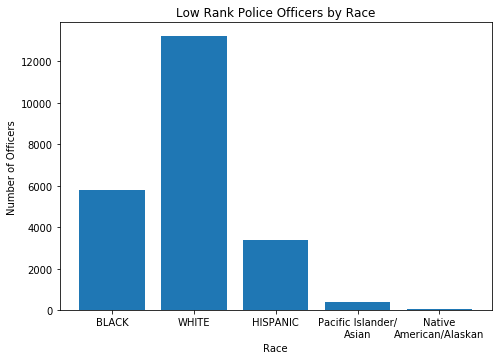

In [162]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals_pofficers = list(rank_race_dict["POLICE OFFICER"].values())
ax.bar(x_vals, y_vals_pofficers)
plt.title("Low Rank Police Officers by Race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [163]:
total_officers = []
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "BLACK"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "WHITE"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "HISPANIC"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "ASIAN/PACIFIC ISLANDER"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == 'NATIVE AMERICAN/ALASKAN NATIVE']))
total_officers



[7275, 19463, 4120, 495, 61]

In [164]:
black_ranks = []
white_ranks = []
other_ranks = []

prop_black_ranks = []
prop_white_ranks = []
prop_other_ranks = []

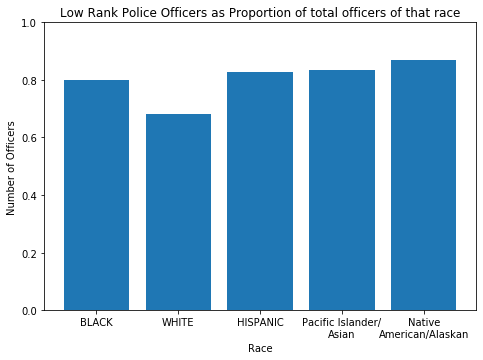

In [165]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"

black_ranks.append(y_vals_pofficers[0])
white_ranks.append(y_vals_pofficers[1])
other_ranks.append(sum(y_vals_pofficers[2:]))

y_vals = []
for i in range(len(races)):
    y_vals.append(y_vals_pofficers[i]/total_officers[i])

prop_black_ranks.append(y_vals[0])
prop_white_ranks.append(y_vals[1])
prop_other_ranks.append(sum(y_vals[2:]))

ax.bar(x_vals, y_vals)
ax.set_ylim([0.0, 1.0])
plt.title("Low Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [166]:
med_rank = [0, 0, 0, 0, 0]
for rank in ["SERGEANT", "FIELD TRAINING OFFICER", "DETECTIVE", "OTHER"]:
    temp_list = list(rank_race_dict[rank].values())
    for x in range(len(races)):
        med_rank[x] = med_rank[x] + temp_list[x]
black_ranks.append(med_rank[0])
white_ranks.append(med_rank[1])
other_ranks.append(sum(med_rank[2:]))
med_rank



[1243, 4973, 629, 74, 8]

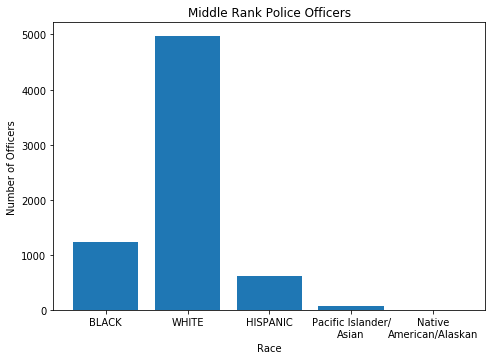

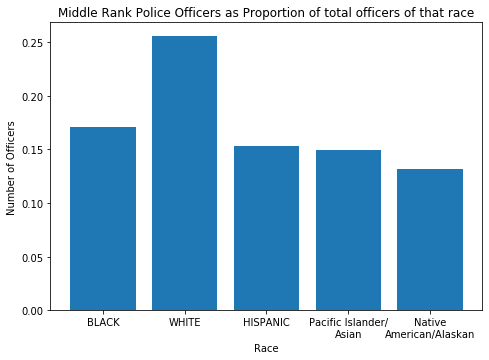

In [167]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = med_rank
ax.bar(x_vals, y_vals)
# ax.set_ylim([0.0, 1.0])
plt.title("Middle Rank Police Officers")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = []
for i in range(len(races)):
    y_vals.append(med_rank[i]/total_officers[i])

prop_black_ranks.append(y_vals[0])
prop_white_ranks.append(y_vals[1])
prop_other_ranks.append(sum(y_vals[2:]))


ax.bar(x_vals, y_vals)
plt.title("Middle Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [168]:
high_rank = [0, 0, 0, 0, 0]
for rank in list(rank_race_dict.keys())[5:]:
    temp_list = list(rank_race_dict[rank].values())
    for x in range(len(races)):
        high_rank[x] = high_rank[x] + temp_list[x]
black_ranks.append(high_rank[0])
white_ranks.append(high_rank[1])
other_ranks.append(sum(high_rank[2:]))             
high_rank


[224, 1259, 88, 9, 0]

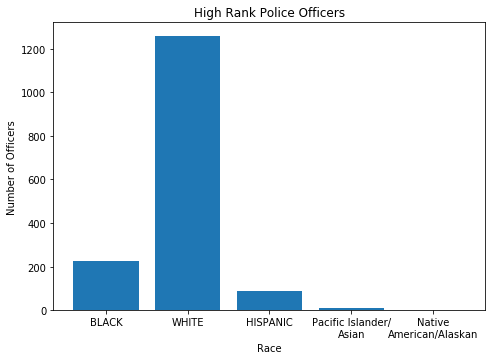

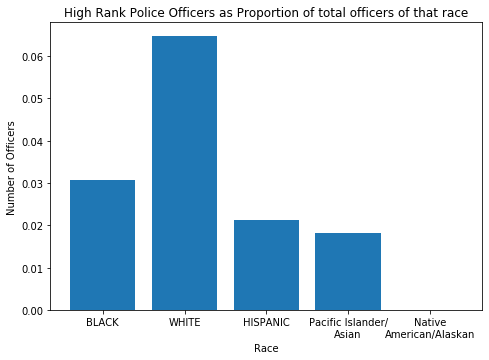

In [169]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = high_rank
ax.bar(x_vals, y_vals)
# ax.set_ylim([0.0, 1.0])
plt.title("High Rank Police Officers")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = []
for i in range(len(races)):
    y_vals.append(high_rank[i]/total_officers[i])

prop_black_ranks.append(y_vals[0])
prop_white_ranks.append(y_vals[1])
prop_other_ranks.append(sum(y_vals[2:]))


ax.bar(x_vals, y_vals)
plt.title("High Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()


In [170]:
sum(black_ranks)

7275

In [171]:
other_ranks

[3868, 711, 97]

In [174]:
normalized_other_ranks = [i/3 for i in prop_other_ranks]
sum(normalized_other_ranks)

1.0

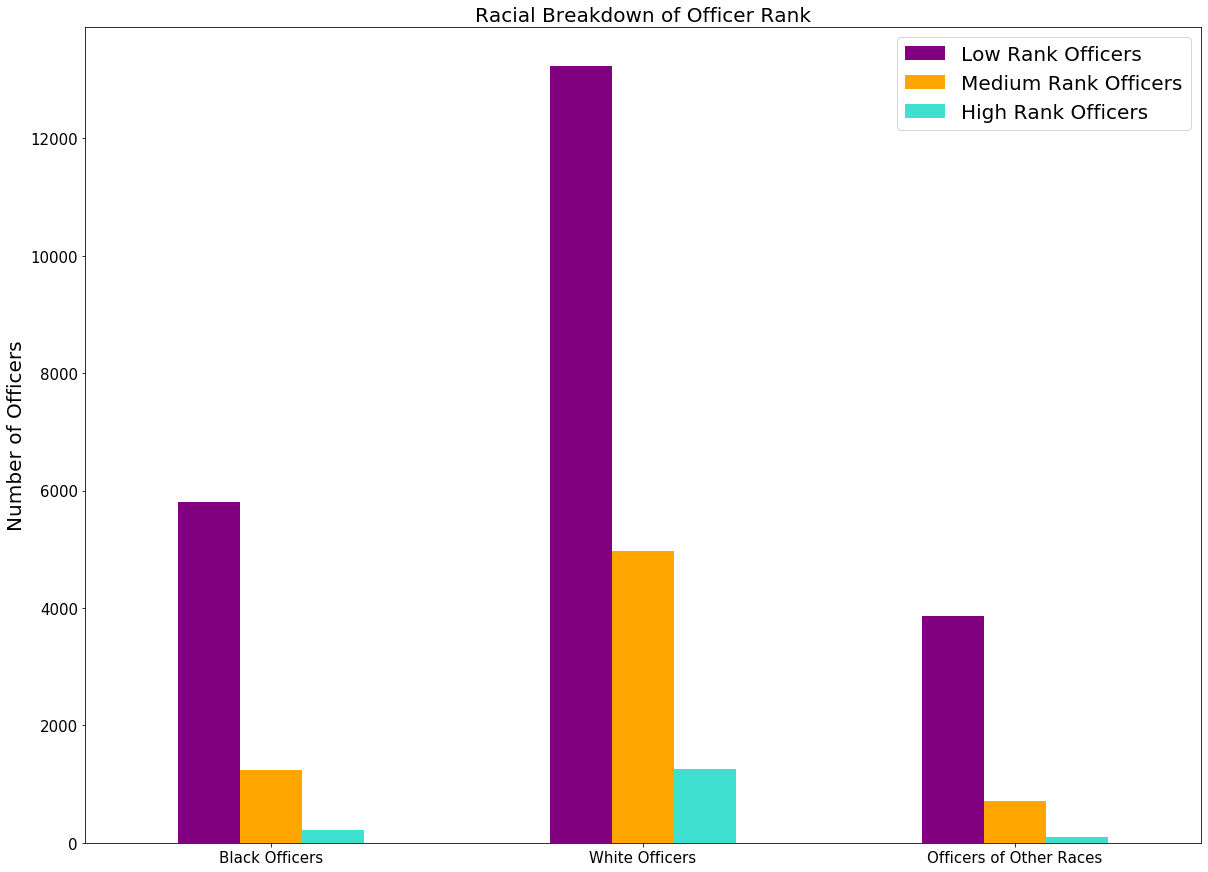

In [173]:
lrank = [black_ranks[0], white_ranks[0], other_ranks[0]]
mrank = [black_ranks[1], white_ranks[1], other_ranks[1]]
hrank = [black_ranks[2], white_ranks[2], other_ranks[2]]
index = ["Black Officers", "White Officers", "Officers of Other Races"]

temp_df = pd.DataFrame({'Low Rank Officers': lrank, "Medium Rank Officers": mrank, "High Rank Officers": hrank}, index =index)
temp_df.plot(kind = 'bar', color = ['purple', 'orange', 'turquoise'], figsize = (20, 15), rot = 0 )
plt.title("Racial Breakdown of Officer Rank", size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Number of Officers", size = 20)
plt.legend(loc = 'upper right', prop={'size':20})


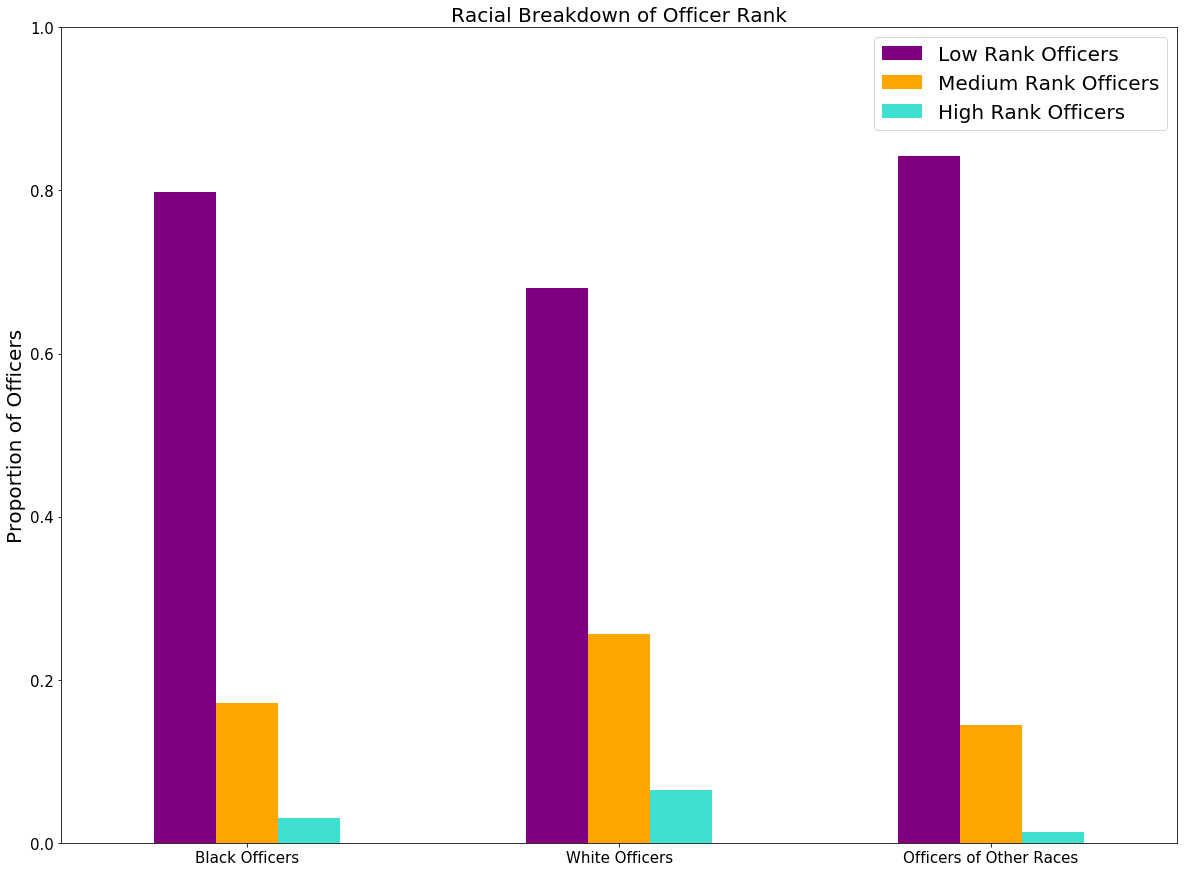

In [176]:
lrank = [prop_black_ranks[0], prop_white_ranks[0], normalized_other_ranks[0]]
mrank = [prop_black_ranks[1], prop_white_ranks[1], normalized_other_ranks[1]]
hrank = [prop_black_ranks[2], prop_white_ranks[2], normalized_other_ranks[2]]
index = ["Black Officers", "White Officers", "Officers of Other Races"]

temp_df = pd.DataFrame({'Low Rank Officers': lrank, "Medium Rank Officers": mrank, "High Rank Officers": hrank}, index =index)
temp_df.plot(kind = 'bar', color = ['purple', 'orange', 'turquoise'], figsize = (20, 15), rot = 0, ylim = (0, 1) )
plt.title("Racial Breakdown of Officer Rank", size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Proportion of Officers", size = 20)
plt.legend(loc = 'upper right', prop={'size':20})


In [194]:
gender_df = officer_df[['cleaned_rank', 'gender']]
gender_df.dropna(subset = ['gender'], inplace = True)
gender_df.dropna(subset = ['cleaned_rank'], inplace = True)
gender_df

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cleaned_rank,gender
4,POLICE OFFICER,MALE
5,POLICE OFFICER,MALE
6,POLICE OFFICER,MALE
7,POLICE OFFICER,MALE
8,POLICE OFFICER,MALE
...,...,...
32476,COMMANDER,MALE
32481,DEPUTY CHIEF,MALE
32489,COMMANDER,MALE
32509,COMMANDER,MALE


In [195]:
gender_df['gender'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [196]:
male_ranks = []
female_ranks = []

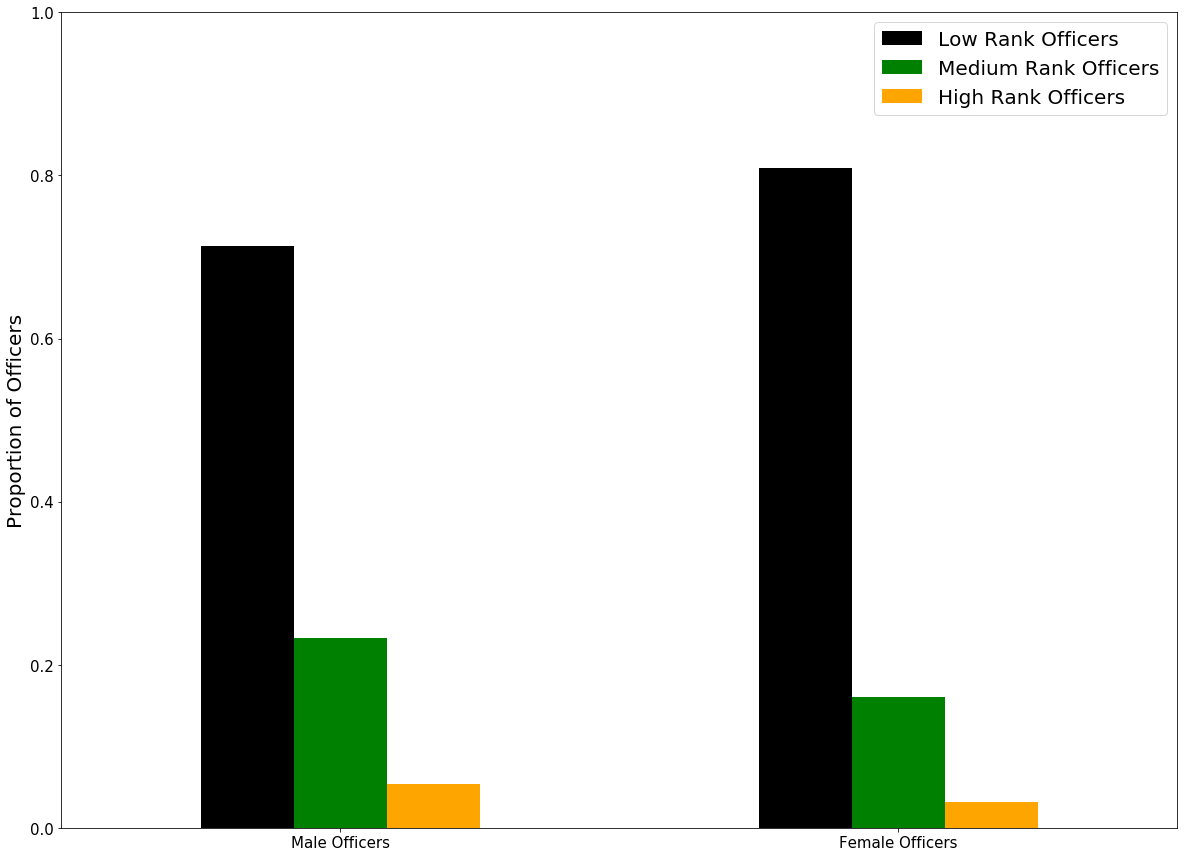

In [223]:
male_ranks = []
female_ranks = []
male_ranks.append(len(gender_df.loc[gender_df['gender'] == 'MALE'].loc[gender_df['cleaned_rank'] == 'POLICE OFFICER']))
female_ranks.append(len(gender_df.loc[gender_df['gender'] == 'FEMALE'].loc[gender_df['cleaned_rank'] == 'POLICE OFFICER']))
med_ranks = ["SERGEANT", "FIELD TRAINING OFFICER", "DETECTIVE", "OTHER"]
male_ranks.append(len(gender_df.loc[gender_df['gender'] == 'MALE'].loc[gender_df['cleaned_rank'].isin(med_ranks)]))
female_ranks.append(len(gender_df.loc[gender_df['gender'] == 'FEMALE'].loc[gender_df['cleaned_rank'].isin(med_ranks)]))
high_ranks = list(rank_race_dict.keys())[5:]
male_ranks.append(len(gender_df.loc[gender_df['gender'] == 'MALE'].loc[gender_df['cleaned_rank'].isin(high_ranks)]))
female_ranks.append(len(gender_df.loc[gender_df['gender'] == 'FEMALE'].loc[gender_df['cleaned_rank'].isin(high_ranks)]))

prop_male_ranks = [i/len(gender_df.loc[gender_df['gender'] == 'MALE']) for i in male_ranks]
prop_female_ranks = [i/len(gender_df.loc[gender_df['gender'] == 'FEMALE']) for i in female_ranks]

lrank = [prop_male_ranks[0], prop_female_ranks[0]]
mrank = [prop_male_ranks[1], prop_female_ranks[1]]
hrank = [prop_male_ranks[2], prop_female_ranks[2]]
gendplot_df = pd.DataFrame({'Low Rank Officers': lrank, 'Medium Rank Officers': mrank, 'High Rank Officers': hrank}, index = ["Male Officers", "Female Officers"])
gendplot_df.plot(kind = 'bar', color = ['black', 'green', 'orange'], figsize = (20, 15), rot = 0, ylim = (0, 1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Proportion of Officers", size = 20)
plt.legend(loc = 'upper right', prop = {'size': 20})



In [211]:
prop_female_ranks = [i/len(gender_df['gender'] == 'FEMALE') for i in female_ranks]
prop_female_ranks

[0.13913513170018746, 0.02754742159946621, 0.00533790868363359]

In [212]:
len(gender_df['gender'] == 'FEMALE')

31473

In [214]:
sum(female_ranks)

5414

In [216]:
gender_df.loc[(gender_df['gender'] == 'FEMALE') & (gender_df['cleaned_rank'] == 'POLICE OFFICER')]

,cleaned_rank,gender
60,POLICE OFFICER,FEMALE
73,POLICE OFFICER,FEMALE
74,POLICE OFFICER,FEMALE
122,POLICE OFFICER,FEMALE
126,POLICE OFFICER,FEMALE
...,...,...
32411,POLICE OFFICER,FEMALE
32426,POLICE OFFICER,FEMALE
32436,POLICE OFFICER,FEMALE
32447,POLICE OFFICER,FEMALE


In [218]:
female_ranks

[4379, 867, 168]

In [219]:
gender_df['cleaned_rank'].unique()

array(['POLICE OFFICER', 'SERGEANT', 'FIELD TRAINING OFFICER',
       'DETECTIVE', 'OTHER', 'LIEUTENANT', 'COMMANDER', 'CAPTAIN',
       'FIRST DEPUTY SUPERINTENDENT', 'DEPUTY CHIEF',
       'ASSISTANT DEPUTY SUPERINTENDENT', 'DEPUTY SUPERINTENDENT',
       'CHIEF', "SUPERINTENDENT'S CHIEF OF STAFF",
       'SUPERINTENDENT OF POLICE', 'ASSISTANT SUPERINTENDENT',
       'DIRECTOR OF CAPS'], dtype=object)

In [220]:
high_ranks

['LIEUTENANT',
 'COMMANDER',
 'CAPTAIN',
 'FIRST DEPUTY SUPERINTENDENT',
 'DEPUTY CHIEF',
 'ASSISTANT DEPUTY SUPERINTENDENT',
 'DEPUTY SUPERINTENDENT',
 'CHIEF',
 "SUPERINTENDENT'S CHIEF OF STAFF",
 'SUPERINTENDENT OF POLICE',
 'ASSISTANT SUPERINTENDENT',
 'DIRECTOR OF CAPS']

In [221]:
med_ranks

['SERGEANT', 'FIELD TRAINING OFFICER', 'DETECTIVE', 'OTHER']